In [33]:
import sys
import sys
sys.path.append('C:\\Users\\alexw\\Documents\\Git\\AI-WORK\\Advanced-Trading')

from simple_heuritic_tradings.utils.utils_df import *
PATH = r"C:\Users\alexw\Documents\Git\AI-WORK\Advanced-Trading\simple_heuritic_tradings\Data\ETHUSDT-5m.zip"
dataframe = opener_dataframe(PATH)

The data frame does not contain the close price, created thanks to open price


<Axes: >

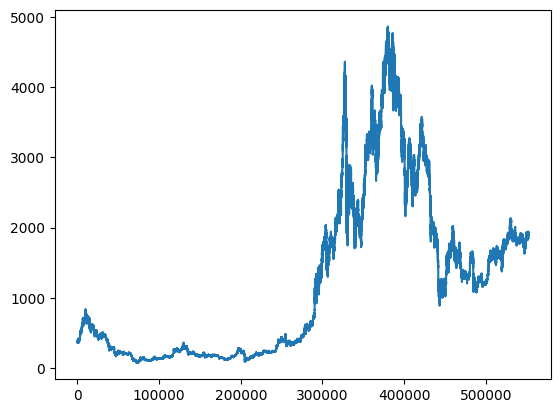

In [34]:
dataframe["open_price"].plot()

In [35]:
import plotly.express as px

# Assuming you have a DataFrame named 'dataframe' with 'open_price' and 'open_time' columns

fig = px.line(dataframe[300000:350000], x='open_date', y='open_price', title='Open Prices Over Time')
fig.show()


In [96]:
window_size = 256
import tqdm as tqdm
from scipy import signal
import random
b, a = signal.butter(8, 0.125)
random_index = random.randint(window_size + 1, len(dataframe) - window_size - 1)
i = random_index
price_signal = dataframe["open_price"].iloc[i - window_size:i].values
price_new_signal = signal.filtfilt(b, a, price_signal, padlen=window_size-1)

In [97]:
from ta.volatility import BollingerBands
from ta.momentum import KAMAIndicator
dataframe['close_ema'] = dataframe['close'].ewm(span=1, adjust=False).mean()
dataframe["KAMAIndicator"] = KAMAIndicator(dataframe["close_ema"]).kama()
price_transformed = dataframe["KAMAIndicator"].iloc[i - window_size:i].values

In [98]:
print(price_transformed)

[604.42157089 604.42809163 604.43338391 604.43660549 604.42102504
 604.39483876 604.07416642 604.04244652 603.93731036 603.9301508
 603.92006412 603.89060457 603.868675   603.9110846  604.44445015
 604.68894862 604.80558029 604.84653024 605.04867636 605.13065086
 605.20821547 605.38114693 605.39548068 605.4087519  605.44190352
 605.4145461  605.41562125 604.60788024 603.16253359 601.9385824
 601.56332798 600.75887147 599.85078392 599.38568439 598.75055741
 597.94213697 596.88201232 596.54609756 596.04086525 595.97384405
 595.75107946 595.75312571 595.75214528 595.67938354 595.67778552
 595.72061764 595.93248946 595.98666582 595.97249998 595.97285789
 595.97765804 595.98273607 595.98449001 595.97224895 595.98403854
 595.99141637 596.00846322 596.01539424 596.08598157 596.09534203
 596.06170826 595.66438906 595.26502398 594.64815628 593.44749534
 589.39575466 588.44624866 586.89868545 586.05873252 585.30890551
 585.10092427 585.17681686 585.07580226 584.98824666 585.00322125
 585.1395646

In [100]:
import plotly.graph_objects as go
# Create a figure to compare the signals
fig = go.Figure()
X = list(range(random_index, random_index + window_size))
fig.add_trace(go.Scatter(x=X,
                         y=price_signal,
                         mode='lines',
                         name='Original Signal'))

fig.add_trace(go.Scatter(x=X,
                         y=price_new_signal,
                         mode='lines',
                         name='Filtered Signal'))
fig.add_trace(go.Scatter(x=X,
                         y=price_transformed,
                         mode='lines',
                         name='KAMAIndicator Signal'))


fig.update_layout(title=f'Comparison of Original and Filtered Signals (Index {random_index})',
                  xaxis_title='Time Index',
                  yaxis_title='Price',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()